# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Marwan Abdalla

ID:49-3054

Tutorial: T6

---

Name: Seif Harfoush

ID: 49-1336

Tutorial: T6

---



## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [103]:
df.describe(include ='all')


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

##change the numerical variables from object to float

In [105]:
from pandas.io.formats.format import decimal


#to change the numerical variables from object to float


df['mmr']=df['mmr'].replace('[\$,]', '', regex=True).astype(float)
df['sellingprice']=df['sellingprice'].replace('[\$,]', '', regex=True).astype(float)
df['odometer']=df['odometer'].replace('([a-zA-Z\s]+)', '', regex=True).astype(float)

df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


##Replace all typos and inconsitencies in the body categorical column


In [106]:
#replace all typos and categorical columns inconsitencies



df['body'].replace({'SuperCrew': 'Pickup Truck'}, regex=True, inplace=True)


df['body'].replace({'coupe': 'Coupe'}, regex=True, inplace=True)
df['body'].replace({'Q60Coupe': 'Coupe'}, regex=True, inplace=True)
df['body'].replace({'CTS-Coupe': 'Coupe'}, regex=True, inplace=True)

df['body'].replace({'Koup': 'Coupe'}, regex=True, inplace=True)

df['body'].replace({'([a-zA-Z\s]*)Coupe': 'Coupe'}, regex=True, inplace=True)




df['body'].replace({'Cab': 'Pickup Truck'}, regex=True, inplace=True)
df['body'].replace({'([a-zA-Z\s]*)cab': 'Pickup Truck'}, regex=True, inplace=True)

df['body'].replace({'Pickup Truck([a-zA-Z\s]*)': 'Pickup Truck'}, regex=True, inplace=True)
df['body'].replace({'Pickup Truck4': 'Pickup Truck'}, regex=True, inplace=True)





df['body'].replace({'Q60Convertible': 'Convertible'}, regex=True, inplace=True)
df['body'].replace({'([a-zA-Z\s]*)Convertible': 'Convertible'}, regex=True, inplace=True)
df['body'].replace({'([a-zA-Z\s]*)convertible': 'Convertible'}, regex=True, inplace=True)
df['body'].replace({'G37Convertible': 'Convertible'}, regex=True, inplace=True)



df['body'].replace({'([a-zA-Z\s]*)Sedan': 'Sedan'}, regex=True, inplace=True)
df['body'].replace({'([a-zA-Z\s]*)sedan': 'Sedan'}, regex=True, inplace=True)


df['body'].replace({'wagon': 'Wagon'}, regex=True, inplace=True)
df['body'].replace({'CTS Wagon': 'Wagon'}, regex=True, inplace=True)
df['body'].replace({'TSX Sport Wagon': 'Wagon'}, regex=True, inplace=True)

df['body'].replace({'MiniVan': 'Minivan'}, regex=True, inplace=True)


df['body'].replace({'([a-zA-Z\s]*)Van': 'Minivan'}, regex=True, inplace=True)

df['body'].replace({'([a-zA-Z\s]*)van': 'Minivan'}, regex=True, inplace=True)

df['body'].replace({'E-Minivan': 'Minivan'}, regex=True, inplace=True)

df['body'].replace({'e-Minivan': 'Minivan'}, regex=True, inplace=True)
df['body'].replace({'hatchback': 'Hatchback'}, regex=True, inplace=True)
df['body'].replace({'regular-Pickup Truck': 'Pickup Truck'}, regex=True, inplace=True)
df['body'].replace({'([a-zA-Z\s]*)Pickup Truck': 'Pickup Truck'}, regex=True, inplace=True)

df['body'].replace({'supercrew': 'SuperCrew'}, regex=True, inplace=True)

df['body'].replace({'suv': 'SUV'}, regex=True, inplace=True)
df['body'].replace({'tsx sport Wagon': 'Wagon'}, regex=True, inplace=True)


df.groupby('body').count()


,year,make,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
body,,,,,,,,,,,,,,,
CTS-Coupe,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Convertible,962,962,962,962,962,962,962,962,962,962,962,962,962,962,962
Coupe,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783
Hatchback,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270
Minivan,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632
Pickup Truck,3847,3847,3847,3847,3847,3847,3847,3847,3847,3847,3847,3847,3847,3847,3847
Q60Convertible,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Q60Coupe,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
SUV,11936,11936,11936,11936,11936,11936,11936,11936,11936,11936,11936,11936,11936,11936,11936


### Should we impute '--' instances in interior with mode?:🧐

In [107]:
#should we impute '--' instances in interior with mode?
# color and interior are filled with -- 
#impute them with the mode?
#too many null variables


In [108]:



#change the transmission to binary?

#shoulud we change the sale date to date?

#we should make a copy of the data and apply label encoding to check for correlations

#for the modelling however it depends on the column (check the emai)

##should we normalize some numerical columns?

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

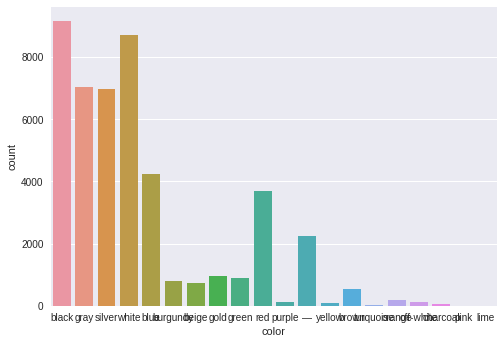

In [109]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

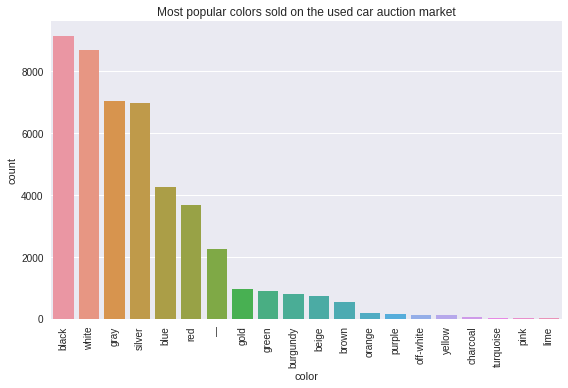

In [110]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

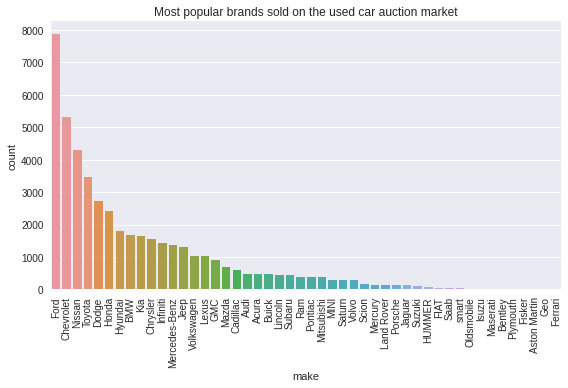

In [111]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, Chevrolet, Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

In [112]:
df[['transmission', 'sellingprice']].groupby('transmission').mean()


,sellingprice
transmission,
automatic,13761.075476
manual,11181.775758


##Dropped Odometers Outliers

In [113]:
indexOdometer = df[(df['odometer'] >= 500000)].index
df.drop(indexOdometer , inplace=True)
df[df['odometer'] > 500000]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


Dropped selling price outlier

In [114]:
#The box plot illustrates that the maximum of each make doesn't exceed 120,0000 thus, anything above is an outlier
spd = df[(df['sellingprice'] >= 120000)].index
df.drop(spd , inplace=True)
df[df['sellingprice'] > 120000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [115]:
# df[df['make']=='Ferari']
# world_df[world_df['region'] == 'NORTHERN AFRICA'].mean()

df.groupby('make').max()

,year,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
make,,,,,,,,,,,,,,,
Acura,2015,ZDX,Type-S,Wagon,manual,jh4ua3641wc006566,wi,5.0,278807.0,—,—,yates buick gmc inc,45200.0,46500.0,Wed May 27 2015 05:30:00 GMT-0700 (PDT)
Aston Martin,2007,V8 Vantage,Base,Coupe,automatic,scfbf03b77gc06216,ca,3.7,12284.0,green,—,desert european motorcars,52500.0,57500.0,Wed Jan 28 2015 10:00:00 GMT-0800 (PST)
Audi,2015,allroad quattro,quattro,Wagon,manual,wuasuafg6bn001668,wi,5.0,203482.0,—,—,zimmerman auto brokers inc,100000.0,102000.0,Wed May 27 2015 06:10:00 GMT-0700 (PDT)
BMW,2015,Z4,xDrive50i,Wagon,manual,wbxpc934x8wj21994,wi,5.0,246306.0,—,—,zimmerman auto brokers inc,95000.0,99000.0,Wed May 27 2015 08:05:00 GMT-0700 (PDT)
Bentley,2010,Continental GTC,Base,Sedan,automatic,scbdr33w57c044595,tx,4.1,92208.0,white,tan,reeves import motorcars inc,93000.0,96000.0,Wed Mar 04 2015 04:30:00 GMT-0800 (PST)
Buick,2015,Verano,Ultra,Sedan,manual,w04gy5gv0b1140885,wi,5.0,262796.0,—,—,zimmerman auto brokers inc,34600.0,36300.0,Wed May 27 2015 06:00:00 GMT-0700 (PDT)
Cadillac,2015,XTS,Vsport Platinum,Wagon,manual,w06vr54r61r075060,wi,5.0,235346.0,—,—,zimmerman auto brokers inc,76000.0,76000.0,Wed May 27 2015 08:35:00 GMT-0700 (PDT)
Chevrolet,2015,malibu,ls,Wagon,manual,kl8cf6s99dc512282,wi,5.0,387537.0,—,—,zmax moto leasing inc,85000.0,84500.0,Wed May 27 2015 08:10:00 GMT-0700 (PDT)
Chrysler,2015,Voyager,Touring-L,Wagon,manual,4c3ag52hx4e102501,wi,5.0,335201.0,—,—,zimmerman auto brokers inc,33600.0,33200.0,Wed May 27 2015 06:15:00 GMT-0700 (PDT)


**Answer for Q2**: Automatic cars on average have a higher selling price than manual cars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

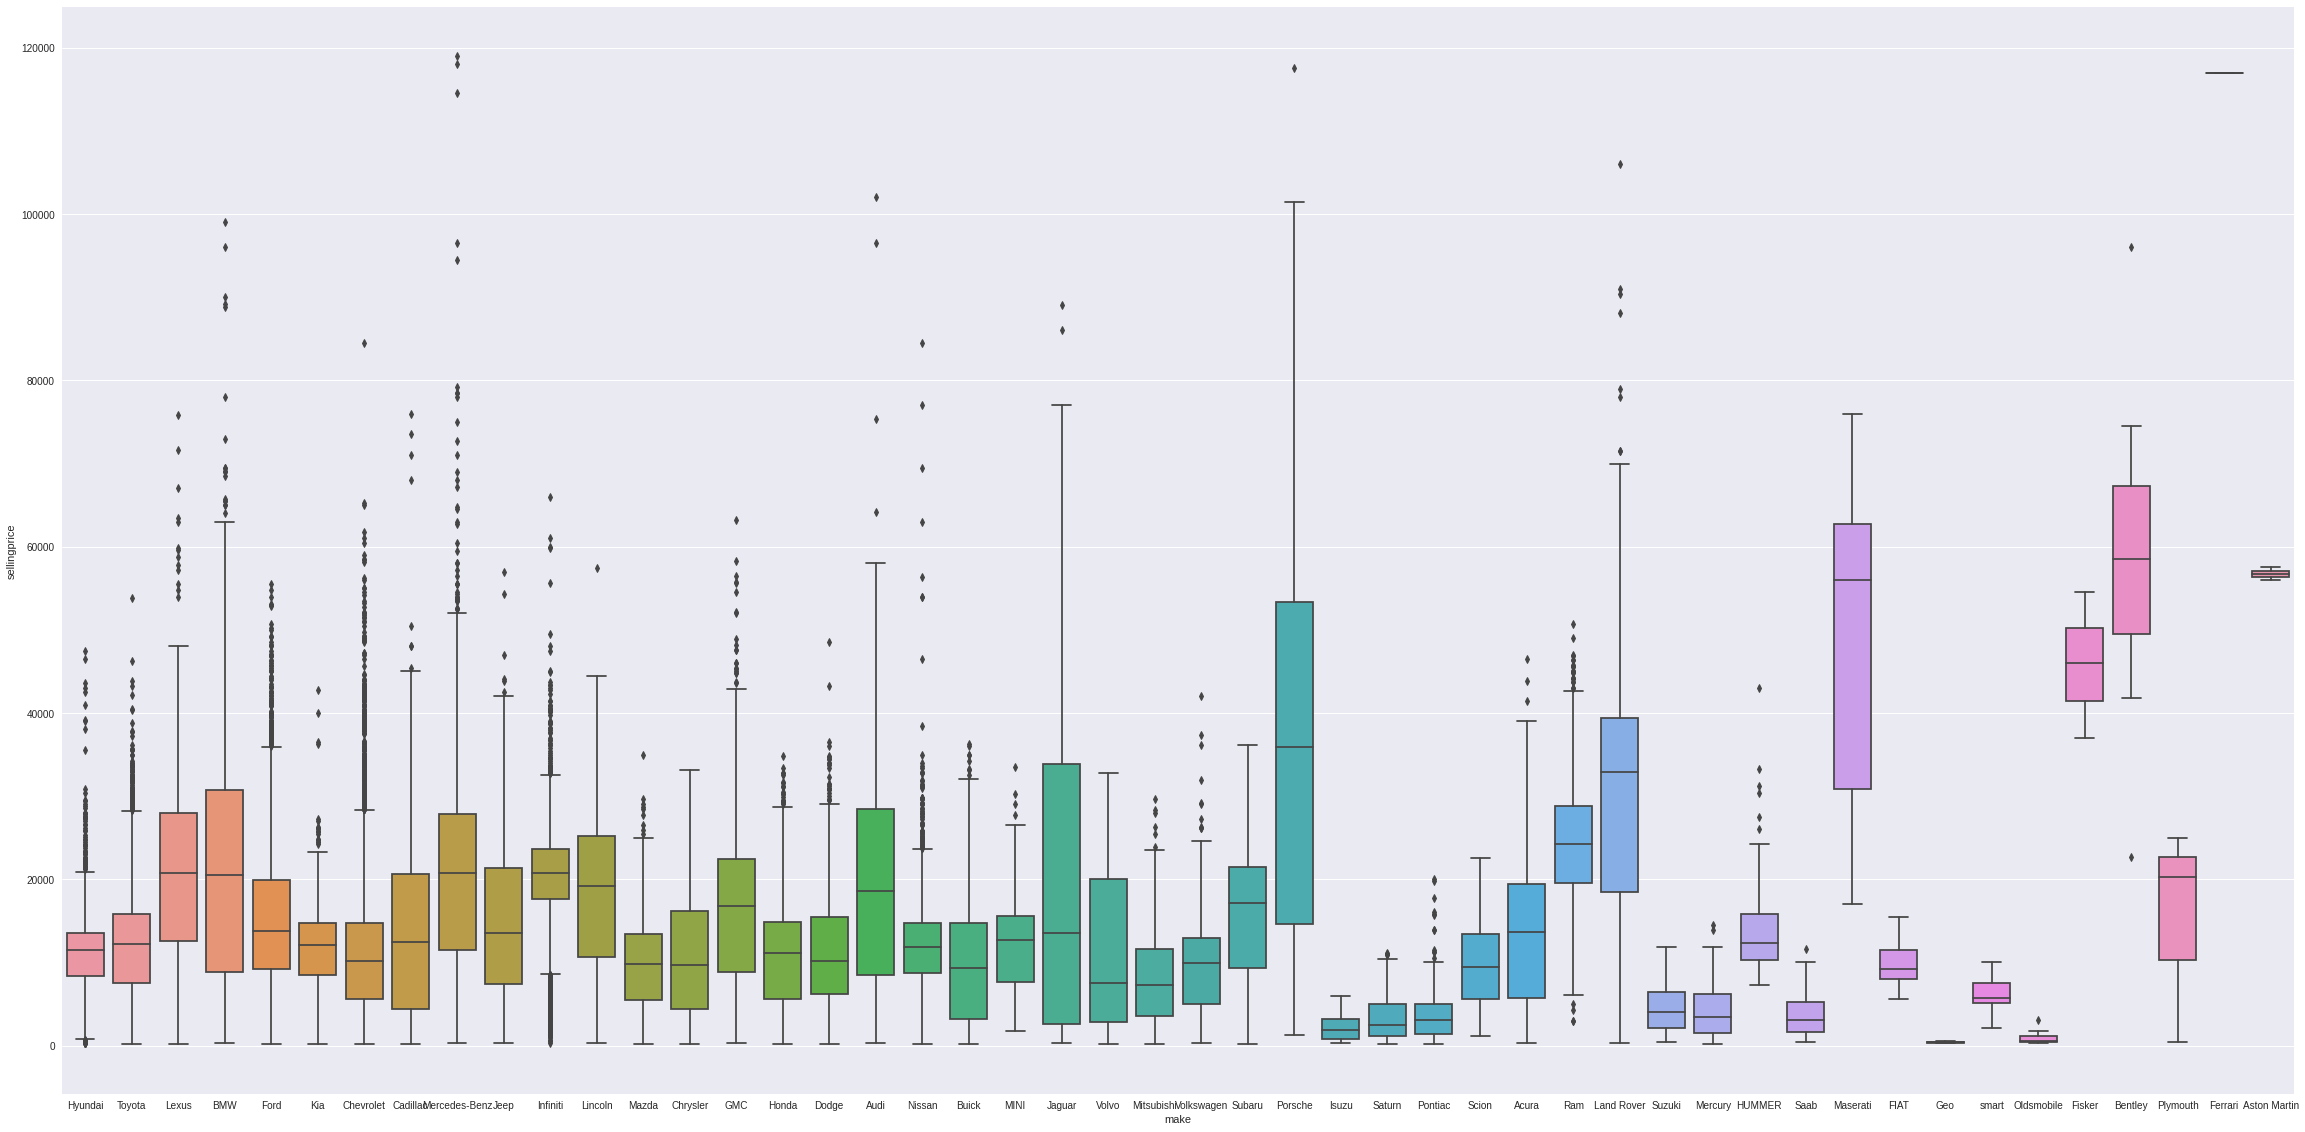

In [116]:
plt.figure(figsize=(40,20))
sns.boxplot(x='make', y='sellingprice', data=df , dodge=False);

#check email, i think we should do multiple box plots next to each other
#points outside should be outliers

**Answer for Q3**: Your answer here

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

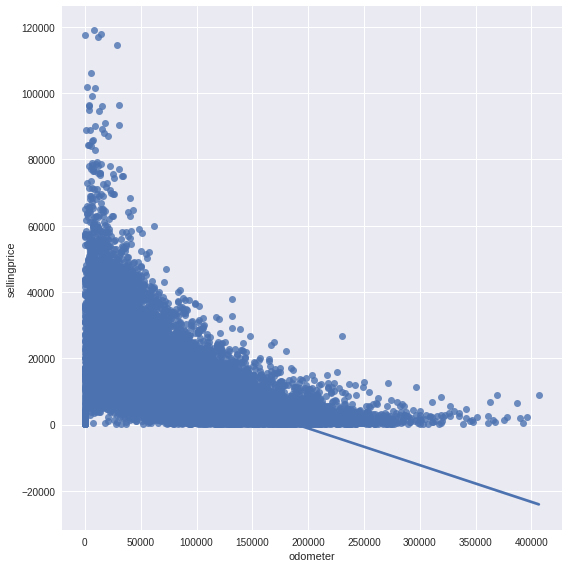

In [117]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8);
#there is outliers in odomter disturbing the model

**Answer for Q4**: Your answer here

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

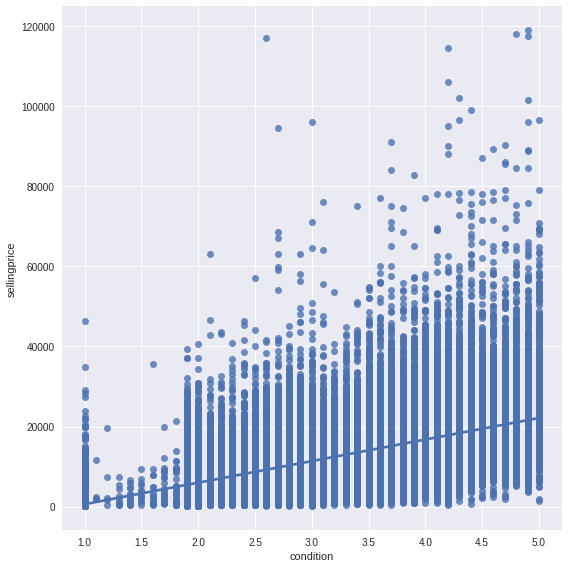

In [118]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8);
#fairly accurate, does it need further testing. is that selling price an outlier (check the previous box plot)
#will include this variable in the model

**Answer for Q5**: Your answer here

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [119]:
df.groupby('body').mean().sort_values('sellingprice', ascending=False)

,year,condition,odometer,mmr,sellingprice
body,,,,,
Q60Convertible,2014.000000,4.600000,18542.000000,34250.000000,36600.000000
CTS-Coupe,2012.000000,2.900000,31730.000000,38950.000000,36000.000000
Q60Coupe,2014.000000,4.050000,20377.000000,28150.000000,27700.000000
SuperCrew,2011.315385,3.776154,62238.646154,24530.961538,24437.307692
Pickup Truck,2009.466337,3.372264,81878.324409,17989.108396,17763.617104
Convertible,2008.928274,3.471518,59187.027027,17704.625780,17542.023909
Coupe,2009.281057,3.348454,64713.272063,16322.653176,16234.486790
SUV,2010.032431,3.572153,71522.133160,16344.573871,16206.569262
Minivan,2010.423632,3.272986,75377.666033,12045.089286,11981.053571


**Answer for Q6**: Yes, the data shows that body type on average affects the average price of the car

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [120]:
df.nunique()

year               26
make               48
model             647
trim             1096
body               12
transmission        2
vin             46568
state              34
condition          41
odometer        39454
color              20
interior           17
seller           4685
mmr              1018
sellingprice      948
saledate         2286
dtype: int64

In [152]:
#smooth outliers found in question 2
#Odomter outlier
#change the transmission to binary? (Hot encoding)
#Divid the odometer variable like the population in the world countries example

#Encode columns using One-Hot
categorical_columns = ["transmission"]
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')


#Encode columns using Label
from sklearn import preprocessing

categ = ["make", "model", "trim", "vin", "state", "seller", "saledate"]
label_encoder = preprocessing.LabelEncoder()

df_encode[categ] = df_encode[categ].apply(label_encoder.fit_transform)
#shoulud we change the sale date object data type to date?

In [140]:
df_encode.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,18,532,494,Sedan,automatic,32774,10,3.9,50404.0,black,gray,4222,11000.0,10900.0,1366
1,2014,44,17,847,SUV,automatic,38934,4,4.9,17846.0,gray,—,490,28700.0,29900.0,1778
2,2012,25,287,278,Sedan,automatic,39118,4,4.1,21122.0,silver,black,2565,22200.0,24200.0,1306
3,2002,3,607,209,SUV,automatic,33594,4,1.9,145303.0,black,black,3320,3675.0,3200.0,2174
4,2014,13,161,382,Minivan,automatic,7650,32,4.9,6714.0,white,gray,4407,22500.0,22100.0,1774


## Modelling

_Apply the linear regression model below._

Train-Test split

In [155]:
from sklearn.model_selection import train_test_split

dc = ["sellingprice","body","color","interior"]

x = df_encode.drop(dc,axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37254
Testing dataset size: 9314


Model Building

In [148]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

Parameter Inspection

In [149]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,154442.088430
1,theta_1,year,-78.408777
2,theta_2,condition,966.972306
3,theta_3,odometer,0.001995
4,theta_4,mmr,0.971423
5,theta_5,saledate,-0.012983


## Model Evaluation

_Evaluate the model you applied._

In [151]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  1502.519176595545
R^2 obtained is: 0.9753959282358123


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

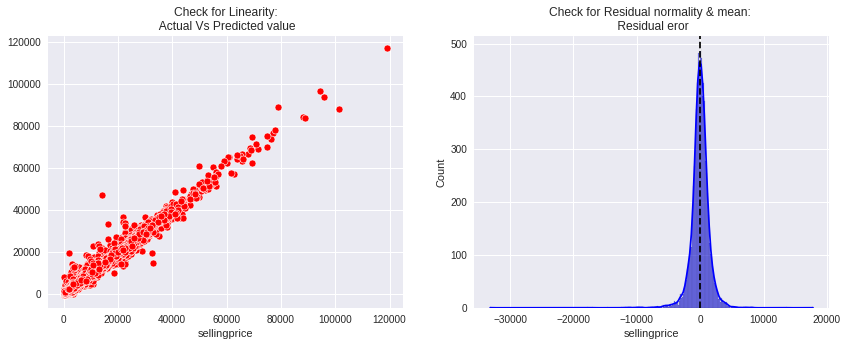

In [156]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.